In [125]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set_style("whitegrid")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import kagglehub

# Download latest version
path = kagglehub.dataset_download("patricklford/global-ev-sales-2010-2024")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/global-ev-sales-2010-2024


# Step 1: Analyze and visualize the EV stock share from 2010 - 2024

## Initialize the Pandas Data-Frame

In [126]:
dataset_name = path + "/IEA Global EV Data 2024.csv"
pandas_frame = pd.read_csv(dataset_name)

In [127]:
pandas_frame.head(100)

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000
...,...,...,...,...,...,...,...,...
95,Austria,Historical,EV stock share,Cars,EV,2010,percent,0.00790
96,Austria,Historical,EV stock share,Cars,EV,2011,percent,0.02200
97,Austria,Historical,EV charging points,EV,Publicly available fast,2011,charging points,0.10000
98,Austria,Historical,EV charging points,EV,Publicly available slow,2011,charging points,0.10000


## Filter the DataFrame for the relevant metric (EV stock share)

Filtering the dataframe for the stock share metric and exclude fields that are not relevant for further calculations.

In [128]:
filtered_frame = pandas_frame[(pandas_frame['parameter'] == 'EV stock share') & (pandas_frame['mode'] == 'Cars')]
filtered_frame = filtered_frame[['region', 'year', 'value']]
filtered_frame = filtered_frame.drop_duplicates(subset=['year', 'region'], keep='last')
filtered_frame = filtered_frame[filtered_frame['year'] <= 2024]

In [129]:
filtered_frame.head(100)

,region,year,value
0,Australia,2011,0.00039
7,Australia,2012,0.00240
12,Australia,2013,0.00460
19,Australia,2014,0.01400
24,Australia,2015,0.02700
...,...,...,...
2389,Denmark,2014,0.13000
2425,Denmark,2015,0.35000
2428,Denmark,2016,0.40000
2469,Denmark,2017,0.42000


## Visualize the EV stock share over the years

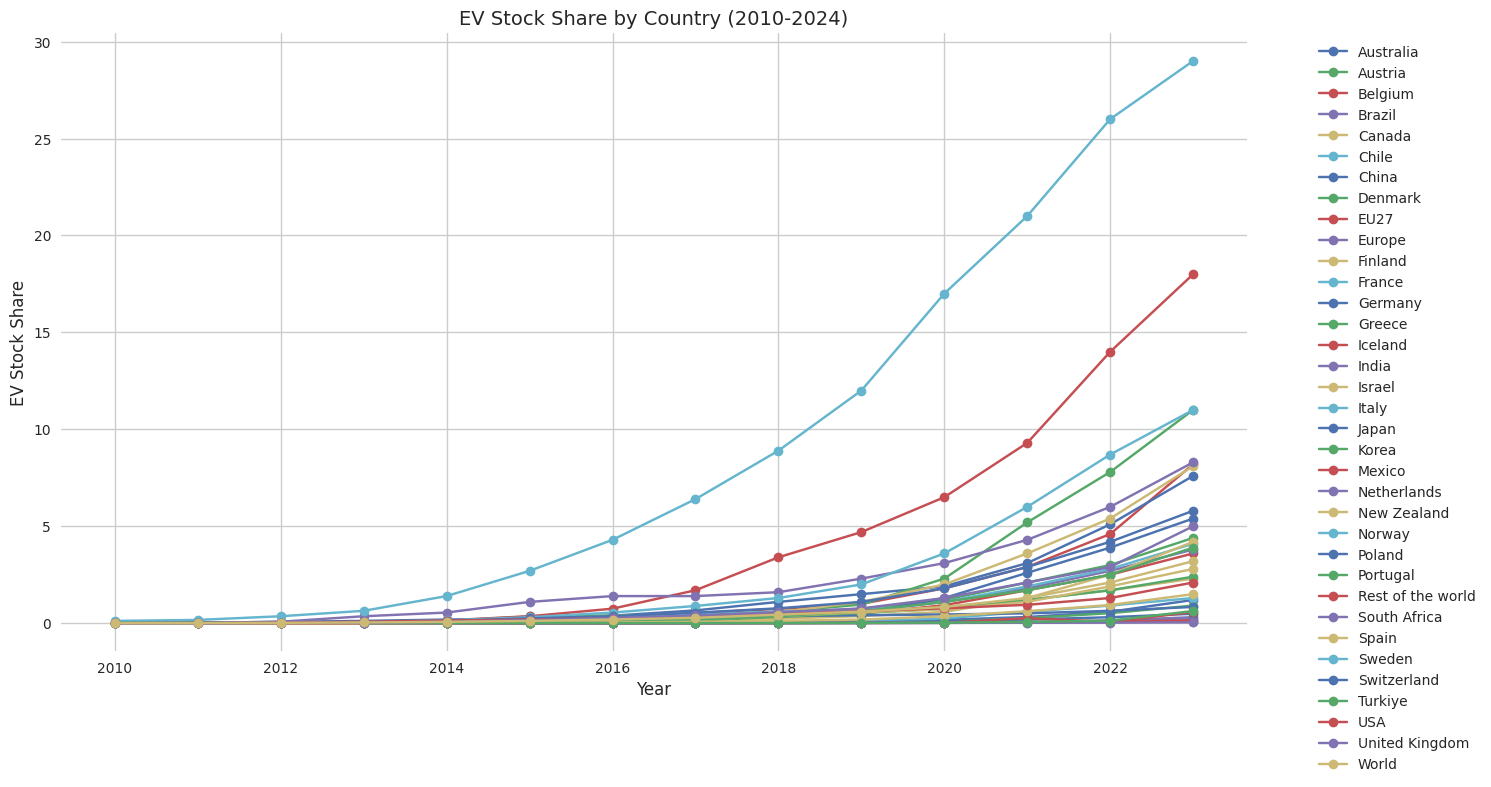

In [130]:
pivot_df = filtered_frame.pivot(index='year', columns='region', values='value')
plt.figure(figsize=(15, 8))
    
for country in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[country], marker='o', label=country)
    
plt.title('EV Stock Share by Country (2010-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('EV Stock Share', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 2: Analyze and visualize the Air-Quality-Data from 2010 - 2023

In [131]:
dataset_name = "/kaggle/input/air-quality-2018-2024-iqair-ag/air-quality-2018-2023.json"
air_quality_frame = pd.read_json(dataset_name)

In [132]:
air_quality_frame.head()

,rank,countryID,country,population,url,flagURL,avg2019,avg2018,avg2020,avg2021,avg2022,avg2023,year,createdAt,updatedAt,name,averageAQI
0,1,C6qfKtSfvq5FAxdC8,Bangladesh,169356251,/bangladesh,https://cdn.airvisual.net/flags/bangladesh.jpg,83.3,97.1,77.1,76.9,65.8,79.9,2023,2024-03-07T02:14:37.470Z,2024-03-07T02:14:37.470Z,Bangladesh,164
1,2,G4AjQzTgGNNSMWdNJ,Pakistan,231402117,/pakistan,https://cdn.airvisual.net/flags/pakistan.jpg,65.8,74.3,59.0,66.8,70.9,73.7,2023,2024-03-07T02:14:37.496Z,2024-03-07T02:14:37.496Z,Pakistan,160
2,3,SPLi4goKT3JDgP4Mm,India,1407563842,/india,https://cdn.airvisual.net/flags/india.jpg,58.1,72.5,51.9,58.1,53.3,54.4,2023,2024-03-07T02:14:37.482Z,2024-03-07T02:14:37.482Z,India,147
3,4,5b9f12d97c0ce216c822baa8,Tajikistan,9750064,/tajikistan,https://cdn.airvisual.net/flags/tajikistan.jpg,NaN,NaN,30.9,59.4,46.0,49.0,2023,2024-03-07T02:14:37.504Z,2024-03-07T02:14:37.504Z,Tajikistan,134
4,5,5b9f12d97c0ce216c822ba2a,Burkina Faso,22100683,/burkina-faso,https://cdn.airvisual.net/flags/burkina-faso.jpg,NaN,NaN,NaN,NaN,63.0,46.6,2023,2024-03-07T02:14:37.474Z,2024-03-07T02:14:37.474Z,Burkina Faso,128


## Filter the DataFrame for the relevant metric (country, 2018, 2019,...)

In [133]:
air_quality_frame = air_quality_frame[['country', 'avg2018', 'avg2019', 'avg2020', 'avg2021', 'avg2022','avg2023']]

# Remove 'avg' from column names
air_quality_frame.columns = air_quality_frame.columns.str.replace('avg', '')

# Get list of countries from filtered_frame
ev_countries = filtered_frame['region'].unique()

# Filter air_quality_frame to keep only countries we have ev data about
air_quality_frame = air_quality_frame[air_quality_frame['country'].isin(ev_countries)]

In [134]:
air_quality_frame.head(10)

,country,2018,2019,2020,2021,2022,2023
2,India,72.5,58.1,51.9,58.1,53.3,54.4
18,China,41.2,39.1,34.7,32.6,30.6,32.5
45,Mexico,20.3,20.0,18.9,19.3,19.5,20.1
46,South Africa,NaN,21.6,18.0,22.7,23.4,19.9
52,Chile,24.9,22.6,19.3,21.7,22.2,18.8
55,Israel,18.6,20.8,16.9,18.7,18.8,17.8
56,Greece,NaN,22.5,18.4,19.0,19.0,17.4
70,Italy,14.9,17.1,18.5,15.2,18.9,15.0
73,Poland,22.4,18.7,16.9,19.1,16.3,14.1
82,Brazil,16.3,15.8,14.2,13.6,12.2,12.6


## Visualize the Air Quality over the years

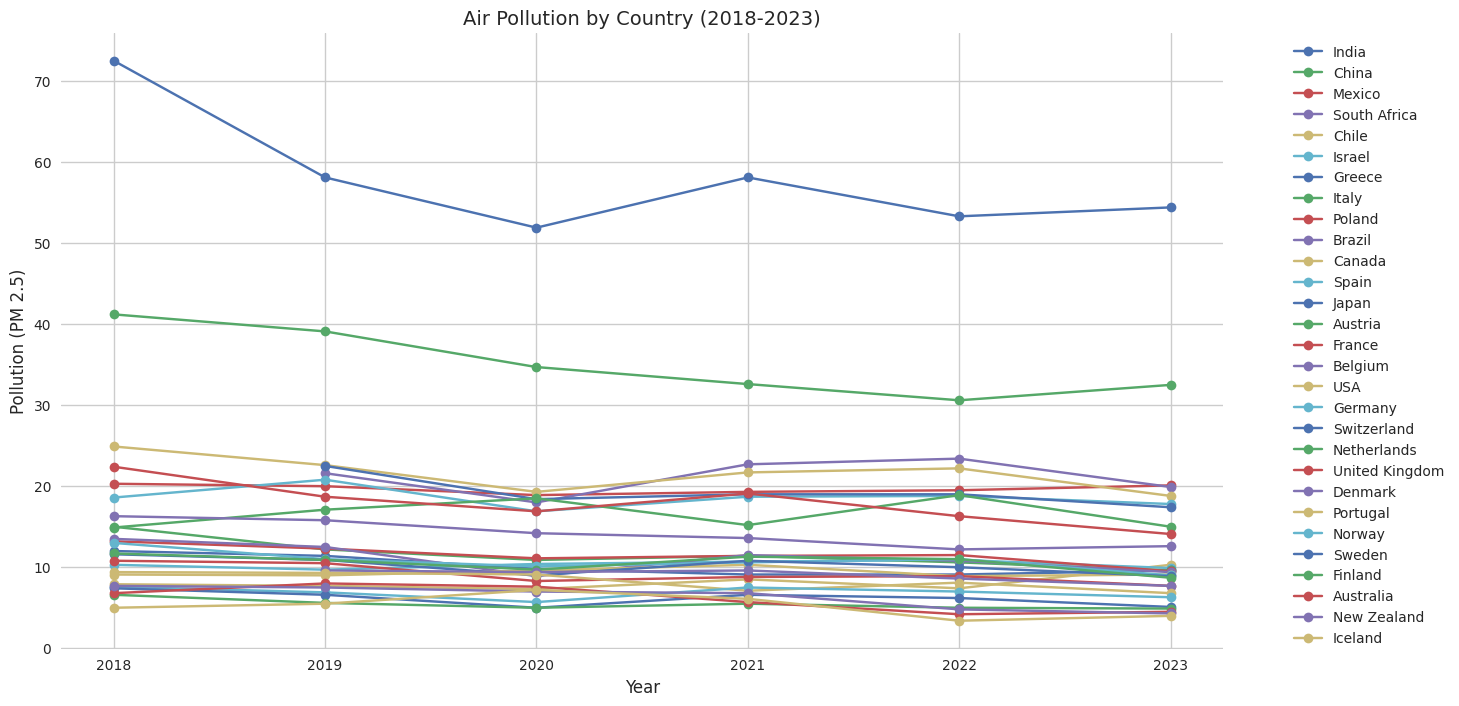

In [135]:
plt.figure(figsize=(15, 8))

# Iterate through each country
for index, row in air_quality_frame.iterrows():
    country = row['country']
    # Get the years data (excluding the country column) and plot
    years_data = row[['2018', '2019', '2020', '2021', '2022', '2023']]
    plt.plot(years_data.index.astype(int), years_data.values, marker='o', label=country)

plt.title('Air Pollution by Country (2018-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Pollution (PM 2.5)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()